In [90]:
import tensorflow as tf
import numpy as np


In [2]:
(X_train,Y_train),(X_test, Y_test) = tf.keras.datasets.mnist.load_data()

(10000, 28, 28)

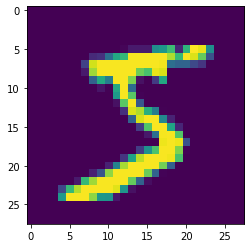

In [91]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0])
X_test.shape

In [4]:
X_train = X_train/255
X_test = X_test/255

In [5]:
X_flattened = X_train.reshape(60000,784)
X_flattened_2 = X_test.reshape(10000, 784)

In [7]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape = (784, ), activation = 'sigmoid'),
    tf.keras.layers.Dense(10, activation='softmax')
    
])
model.compile(
loss = tf.keras.losses.sparse_categorical_crossentropy,
optimizer = tf.keras.optimizers.Adam(learning_rate= 0.01),
metrics=['accuracy'])

history = model.fit(X_flattened,Y_train, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4251 - accuracy: 0.8852
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2959 - accuracy: 0.9141
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2787 - accuracy: 0.9199
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2660 - accuracy: 0.9241
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2605 - accuracy: 0.9258
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2562 - accuracy: 0.9270
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2481 - accuracy: 0.9283
Epoch 8/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2459 - accuracy: 0.9297
Epoch 9/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2414 - accuracy: 0.9310
Epoch 10/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.240

In [8]:
model.evaluate(X_flattened_2,Y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2852 - accuracy: 0.9223


[0.28519609570503235, 0.9222999811172485]

Text(0, 0.5, 'loss')

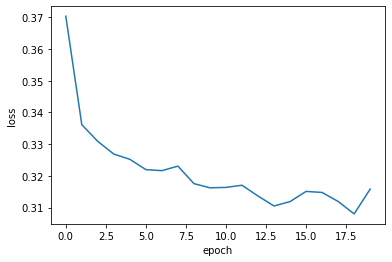

In [61]:
%matplotlib inline
x = history.history['loss']
y = history.epoch
plt.plot(y,x)
plt.xlabel('epoch')
plt.ylabel('loss')


In [11]:
X_flattened_2[55].shape

(784,)

In [13]:
predicted_values = model.predict(X_flattened_2)

<tf.Tensor: shape=(), dtype=int64, numpy=7>

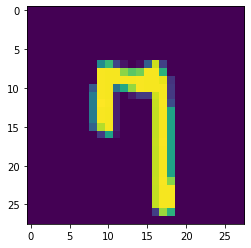

In [22]:
plt.imshow(X_test[80])

In [39]:
class Number_classifier:
    def __init__(self, i, X_data= X_test):
        self.i = i
        self.X_data = X_data
    def show_number(self):
       return plt.imshow(self.X_data[self.i])
    def predict_number(self):
        return tf.argmax(predicted_values[self.i]).numpy()

In [42]:
Number_classifier(45).predict_number()

5

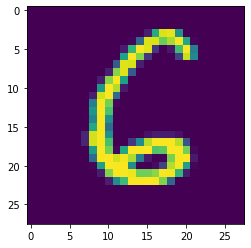

In [43]:
Number_classifier(98).show_number()

In [44]:
Number_classifier(98).predict_number()

6

In [45]:
model.save('Number_Classifier.h5')

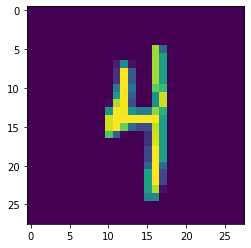

In [46]:
Number_classifier(65).show_number()

In [47]:
Number_classifier(65).predict_number()

4

In [48]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                110       
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________
